In [16]:
import os
import sklearn
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

tf.random.set_seed(42)

data = '211027_70ms_3ea_Data_2kPa'
dataname = data+'_36'
filename = 'myData/'+data+'.csv'
SD = pd.read_csv(filename)
SD=SD.iloc[:,:28]
SensorData = SD

In [17]:
SDext =SD # SensorData[SensorData['z']==0]
mask = [[1.8],[270],[50]]

Rmask = SDext["r"].isin(mask[0])
Tmask = SDext["theta"].isin(mask[1])
Zmask = SDext["z"].isin(mask[2])

SD = SDext[Rmask & Tmask & Zmask]

In [18]:
import numpy as np
toRad = np.pi/180 

# Sensor Scale

for i in range(0,24):
    SD['Sx{0:02X}'.format(i)] = (SD['Sx{0:02X}'.format(i)]-SD['Sx{0:02X}'.format(i)].mean())/SD['Sx{0:02X}'.format(i)].std()*5+45    

<ipython-input-18-f72194da0e36>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SD['Sx{0:02X}'.format(i)] = (SD['Sx{0:02X}'.format(i)]-SD['Sx{0:02X}'.format(i)].mean())/SD['Sx{0:02X}'.format(i)].std()*5+45


In [19]:
SD

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,...,Sx12,Sx13,Sx14,Sx15,Sx16,Sx17,r,theta,theta_enc,z
21989,44.743113,49.235753,52.710125,42.005397,46.311781,49.929148,38.278078,38.960627,38.795119,50.233312,...,34.868874,39.317424,52.063582,41.362036,53.351722,41.973095,1.8,270,291.62,50
21990,44.743113,41.262571,45.856681,46.568602,46.311781,46.774493,46.882138,58.286620,42.541462,38.815176,...,43.289550,46.894192,45.511854,57.992728,44.822304,34.798210,1.8,270,291.62,50
21991,40.632914,49.235753,42.429958,46.568602,57.760048,40.465184,46.882138,50.556223,50.034149,38.815176,...,43.289550,46.894192,42.235990,49.677382,47.665443,45.560538,1.8,270,291.62,50
21992,44.743113,49.235753,45.856681,51.131806,42.495691,49.929148,40.429093,42.825826,38.795119,42.621222,...,47.499888,46.894192,45.511854,44.133818,53.351722,41.973095,1.8,270,291.62,50
21993,48.853311,46.578026,45.856681,42.005397,46.311781,49.929148,44.731123,42.825826,42.541462,46.427267,...,47.499888,35.529040,48.787718,49.677382,47.665443,49.147981,1.8,270,291.62,50
21994,40.632914,49.235753,49.283403,51.131806,34.863513,56.238457,53.335183,38.960627,46.287805,46.427267,...,34.868874,46.894192,48.787718,49.677382,50.508583,49.147981,1.8,270,291.62,50
21995,36.522715,51.893480,42.429958,42.005397,46.311781,43.619839,38.278078,42.825826,46.287805,57.845403,...,43.289550,46.894192,48.787718,41.362036,50.508583,41.973095,1.8,270,291.62,50
21996,40.632914,51.893480,42.429958,55.695011,46.311781,37.310529,44.731123,50.556223,53.780492,42.621222,...,51.710227,43.105808,48.787718,44.133818,47.665443,45.560538,1.8,270,291.62,50
21997,40.632914,41.262571,49.283403,46.568602,46.311781,46.774493,49.033153,38.960627,42.541462,50.233312,...,43.289550,50.682576,38.960126,38.590254,47.665443,41.973095,1.8,270,291.62,50
21998,44.743113,43.920298,42.429958,46.568602,46.311781,46.774493,44.731123,42.825826,50.034149,46.427267,...,55.920565,43.105808,48.787718,44.133818,41.979164,38.385652,1.8,270,291.62,50


In [20]:
Theta = np.zeros(24)
for i in range(0,24):
    
    #센서 위치와 번호 할당
    
    eight = divmod(i, 8) # eight[0] 몫   eight[1] 나머지
    four = divmod(i, 4) # four[0] 몫   four[1] 나머지
    ind = divmod(four[0],2) # indicator[0] 몫 indicator[1] 나머지  (ind : indicator)

    Theta[i] = ((-1) ** ind[1]) * 30 * eight[1] + 210 * ind[1] + 120 * ind[0]    

    ballR = SD['Sx{0:02X}'.format(i)]
    ballX = ballR*np.cos(Theta[i]*toRad)
    ballY = ballR*np.sin(Theta[i]*toRad)
    # 정수형을 ballX 갯수만큼 리스트 생성
    n = int(len(ballX)/2)
    ballZ_front = [52 + ind[0] * 42] * n
    ballZ_rear = [52 + ind[1] * 42] * n
    ballZ= ballZ_front + ballZ_rear
    
    SD['Sx{0:02X}_X'.format(i)]  = ballX
    SD['Sx{0:02X}_Y'.format(i)]  = ballY
    SD['Sx{0:02X}_Z'.format(i)]  = ballZ

<ipython-input-20-4ce4ffeb4697>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SD['Sx{0:02X}_X'.format(i)]  = ballX
<ipython-input-20-4ce4ffeb4697>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SD['Sx{0:02X}_Y'.format(i)]  = ballY
<ipython-input-20-4ce4ffeb4697>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [21]:
SDxyz = SD

# 3D scatter

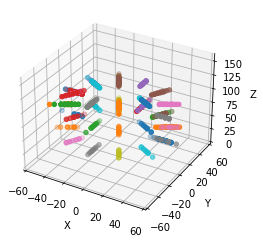

<Figure size 576x576 with 0 Axes>

In [22]:
fig  = plt.figure()
plt.figure(figsize = (8,8))
ax = fig.gca(projection = '3d')

for i in range(0,24):
    ax.scatter(SDxyz['Sx{0:02X}_X'.format(i)],SDxyz['Sx{0:02X}_Y'.format(i)] ,SDxyz['Sx{0:02X}_Z'.format(i)])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim3d(-60, 60)
ax.set_ylim3d(-60, 60)
ax.set_zlim3d(0, 160)

plt.suptitle('point cloud')
plt.show()

# 2D scatter (circular)

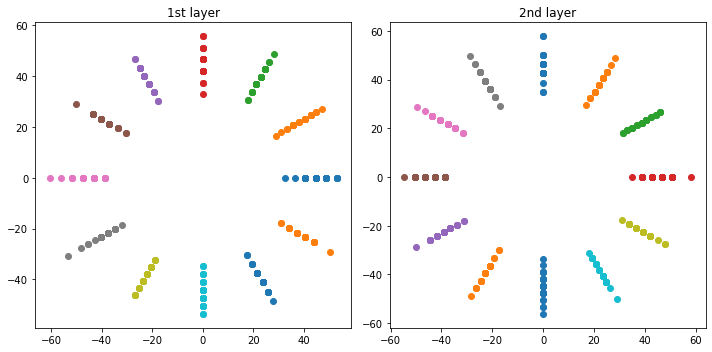

R      :  1.8
Theta :  270
Z      :  50


In [23]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)

for i in range(0,4):
    plt.scatter(SDxyz['Sx{0:02X}_X'.format(i)],SDxyz['Sx{0:02X}_Y'.format(i)])
for i in range(8,12):
    plt.scatter(SDxyz['Sx{0:02X}_X'.format(i)],SDxyz['Sx{0:02X}_Y'.format(i)])
for i in range(16,20):
    plt.scatter(SDxyz['Sx{0:02X}_X'.format(i)],SDxyz['Sx{0:02X}_Y'.format(i)])
plt.title('1st layer')

plt.subplot(1,2,2)
for i in range(4,8):
    plt.scatter(SDxyz['Sx{0:02X}_X'.format(i)],SDxyz['Sx{0:02X}_Y'.format(i)])
for i in range(12,16):
    plt.scatter(SDxyz['Sx{0:02X}_X'.format(i)],SDxyz['Sx{0:02X}_Y'.format(i)])
for i in range(20,24):
    plt.scatter(SDxyz['Sx{0:02X}_X'.format(i)],SDxyz['Sx{0:02X}_Y'.format(i)])
plt.title('2nd layer')

plt.tight_layout()
plt.show()
print('R      : ', mask[0][0])
print('Theta : ', mask[1][0])
print('Z      : ', mask[2][0])

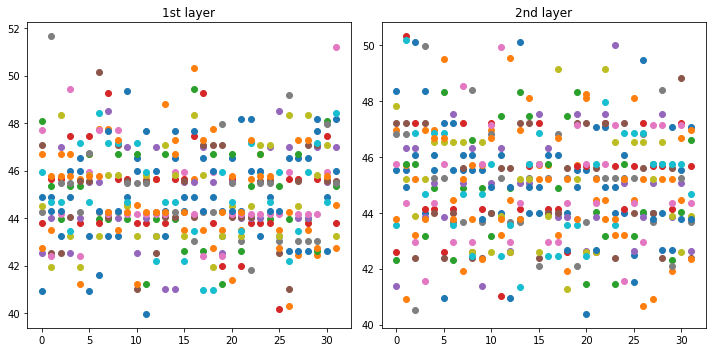

R      :  1.8
Theta :  270
Z      :  50


In [15]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)

x = range(0,32)

for i in range(0,4):
    plt.scatter(x,SDxyz['Sx{0:02X}'.format(i)])
for i in range(8,12):
    plt.scatter(x,SDxyz['Sx{0:02X}'.format(i)])
for i in range(16,20):
    plt.scatter(x,SDxyz['Sx{0:02X}'.format(i)])
plt.title('1st layer')

plt.subplot(1,2,2)
for i in range(4,8):
    plt.scatter(x,SDxyz['Sx{0:02X}'.format(i)])
for i in range(12,16):
    plt.scatter(x,SDxyz['Sx{0:02X}'.format(i)])
for i in range(20,24):
    plt.scatter(x,SDxyz['Sx{0:02X}'.format(i)])
plt.title('2nd layer')

plt.tight_layout()
plt.show()
print('R      : ', mask[0][0])
print('Theta : ', mask[1][0])
print('Z      : ', mask[2][0])

In [14]:
len(SDxyz['Sx00'])

32